In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hopsworks
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Read from .env
HOPSWORKS_API_KEY = os.getenv("aqi_forecast_api_key")

if not HOPSWORKS_API_KEY:
    raise ValueError("API key not found. Check .env file.")

# Connect to Hopsworks
project = hopsworks.login(api_key_value=HOPSWORKS_API_KEY)

# Fetch and read feature group
fs = project.get_feature_store()
fg = fs.get_feature_group("aqi_features", 1)
df = fg.read()

df.tail()


2025-10-31 14:36:13,823 INFO: Initializing external client
2025-10-31 14:36:13,823 INFO: Base URL: https://c.app.hopsworks.ai:443




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


2025-10-31 14:36:17,070 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1251493
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.11s) 


,timestamp_utc,ow_temp,ow_pressure,ow_humidity,ow_wind_speed,ow_wind_deg,ow_clouds,ow_co,ow_no2,ow_pm2_5,ow_pm10,aqi_aqicn,hour,day,month,weekday,lag_1,lag_2,rolling_mean_3
113,2025-10-31 01:56:29.355039+00:00,22.07,1011.0,49.0,2.06,60.0,5.0,2.4,8.1,23.0,9.0,23.0,1,31,10,4,43.0,42.0,36.000000
114,2025-10-31 04:31:07.205972+00:00,27.07,1012.0,36.0,3.09,20.0,5.0,4.5,8.5,13.0,10.0,13.0,4,31,10,4,23.0,43.0,26.333333
115,2025-10-31 08:16:47.402014+00:00,35.07,1009.0,15.0,3.60,40.0,27.0,5.0,8.2,32.0,14.0,32.0,8,31,10,4,13.0,23.0,22.666667
116,2025-10-31 08:33:15.865260+00:00,35.07,1008.0,15.0,4.12,50.0,20.0,5.0,8.2,32.0,14.0,32.0,8,31,10,4,32.0,13.0,25.666667
117,2025-10-31 09:33:18.010437+00:00,35.07,1008.0,15.0,4.12,30.0,32.0,3.5,8.1,27.0,13.0,27.0,9,31,10,4,32.0,32.0,30.333333


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test_rescaled, label="Actual AQI", color="blue")
plt.plot(y_pred_rescaled, label="Predicted AQI", color="orange")
plt.title("Predicted vs Actual AQI")
plt.xlabel("Time Step")
plt.ylabel("AQI")
plt.legend()
plt.show()


In [23]:
#data overview
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype                  
---  ------          --------------  -----                  
 0   timestamp_utc   115 non-null    datetime64[us, Etc/UTC]
 1   ow_temp         115 non-null    float64                
 2   ow_pressure     115 non-null    float64                
 3   ow_humidity     115 non-null    float64                
 4   ow_wind_speed   115 non-null    float64                
 5   ow_wind_deg     115 non-null    float64                
 6   ow_clouds       115 non-null    float64                
 7   ow_co           115 non-null    float64                
 8   ow_no2          115 non-null    float64                
 9   ow_pm2_5        115 non-null    float64                
 10  ow_pm10         115 non-null    float64                
 11  aqi_aqicn       115 non-null    float64                
 12  hour            115 non-null    int6

timestamp_utc     0
ow_temp           0
ow_pressure       0
ow_humidity       0
ow_wind_speed     0
ow_wind_deg       0
ow_clouds         0
ow_co             0
ow_no2            0
ow_pm2_5          0
ow_pm10           0
aqi_aqicn         0
hour              0
day               0
month             0
weekday           0
lag_1             0
lag_2             0
rolling_mean_3    0
dtype: int64

In [24]:
#sort dataset
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], utc=True)
df = df.sort_values("timestamp_utc").reset_index(drop=True)


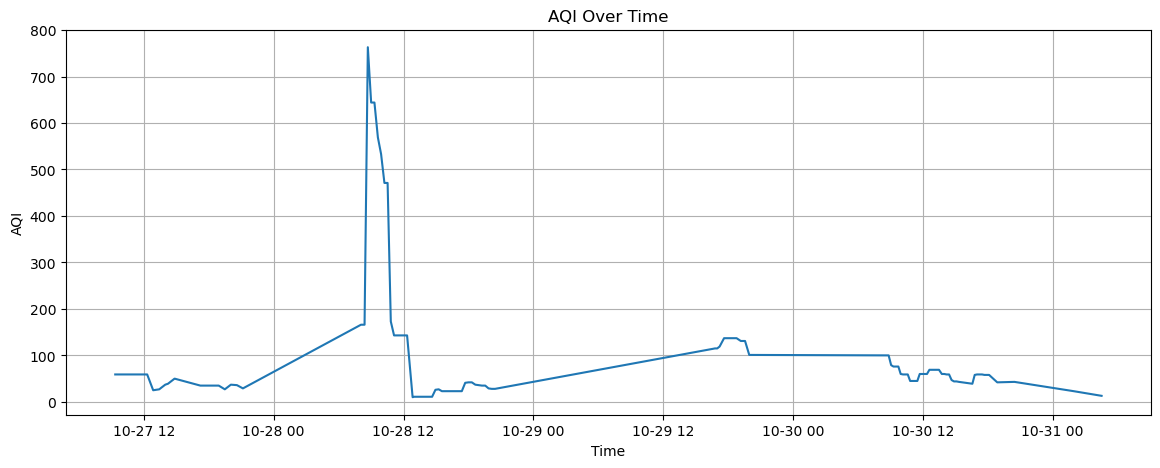

In [25]:
#time series plot
plt.figure(figsize=(14, 5))
plt.plot(df["timestamp_utc"], df["aqi_aqicn"])
plt.title("AQI Over Time")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


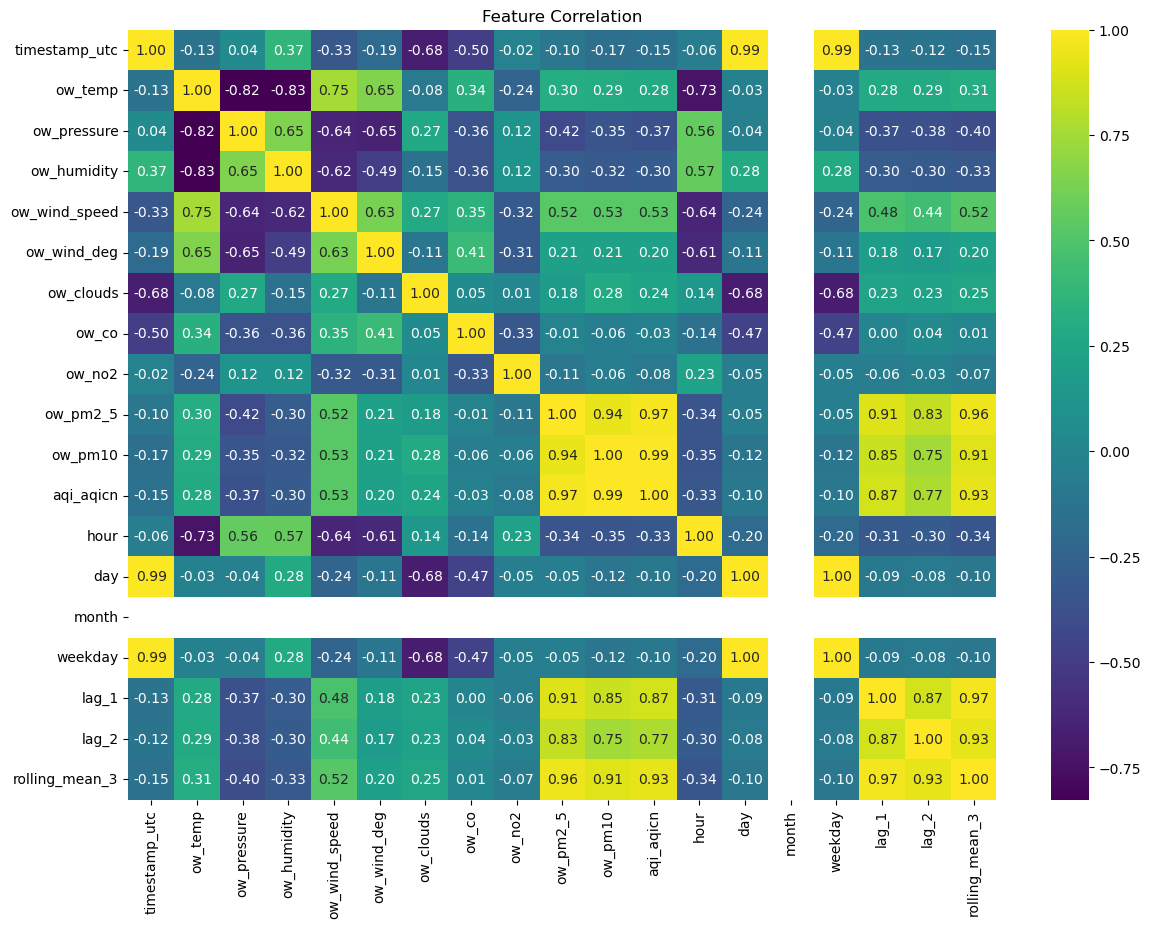

In [26]:
##correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Feature Correlation")
plt.show()


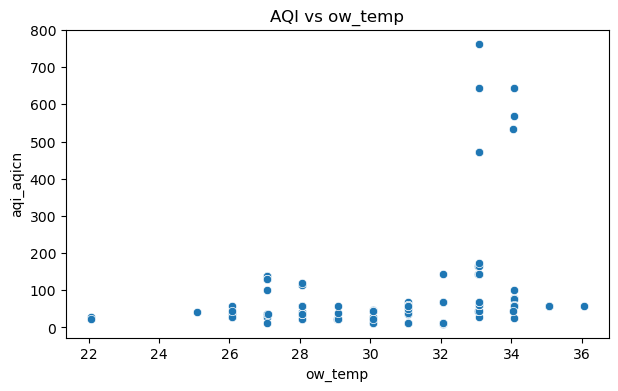

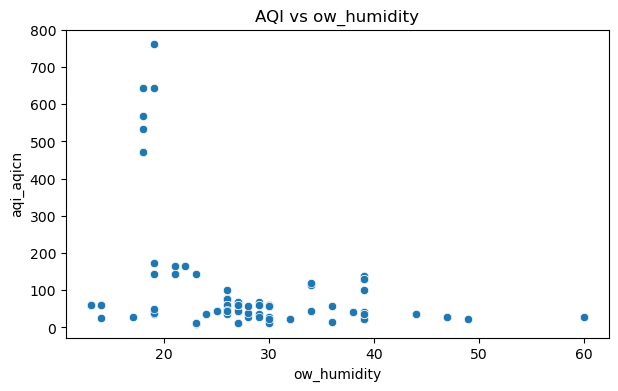

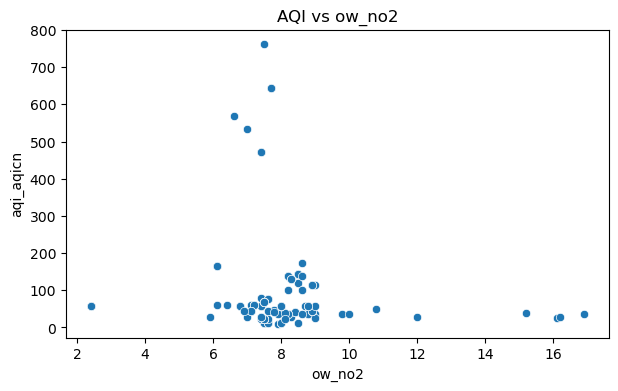

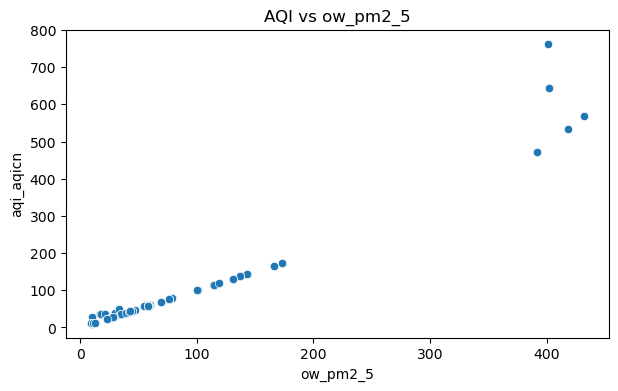

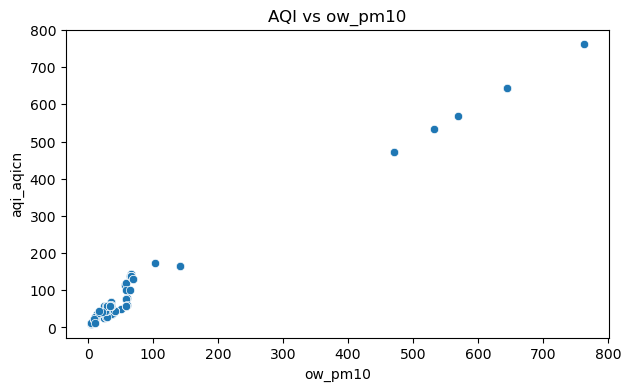

In [27]:
#weather vs aqi relations
features = ["ow_temp", "ow_humidity", "ow_no2", "ow_pm2_5", "ow_pm10"]

for col in features:
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df, x=col, y="aqi_aqicn")
    plt.title(f"AQI vs {col}")
    plt.show()


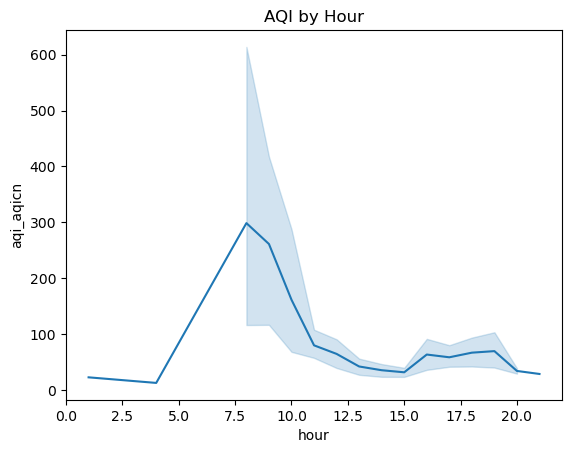

2025-10-31 12:52:42,650 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-31 12:52:42,654 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


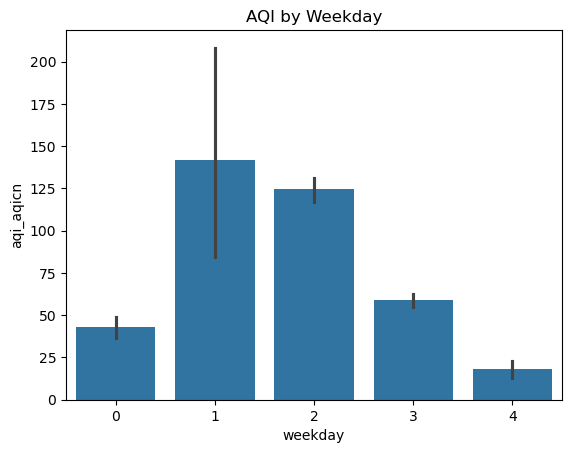

In [28]:
#seasonal patterns
sns.lineplot(data=df, x="hour", y="aqi_aqicn")
plt.title("AQI by Hour")
plt.show()

sns.barplot(data=df, x="weekday", y="aqi_aqicn")
plt.title("AQI by Weekday")
plt.show()
